In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
#from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

#rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
!gdown --id 1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3 --output london_bike_sharing.csv

Downloading...
From: https://drive.google.com/uc?id=1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3
To: C:\Users\ven_n_000\Desktop\iod_work\2019_12_09_DS_FT_SYD_Projects\miruna\labs\module_5\london_bike_sharing.csv

  0%|          | 0.00/1.03M [00:00<?, ?B/s]
 51%|#####     | 524k/1.03M [00:00<00:00, 2.37MB/s]
100%|##########| 1.03M/1.03M [00:00<00:00, 3.92MB/s]


In [5]:
df = pd.read_csv(
  "london_bike_sharing.csv", 
  parse_dates=['timestamp'], 
  index_col="timestamp"
)

In [6]:
df.shape

(17414, 9)

In [7]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [10]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


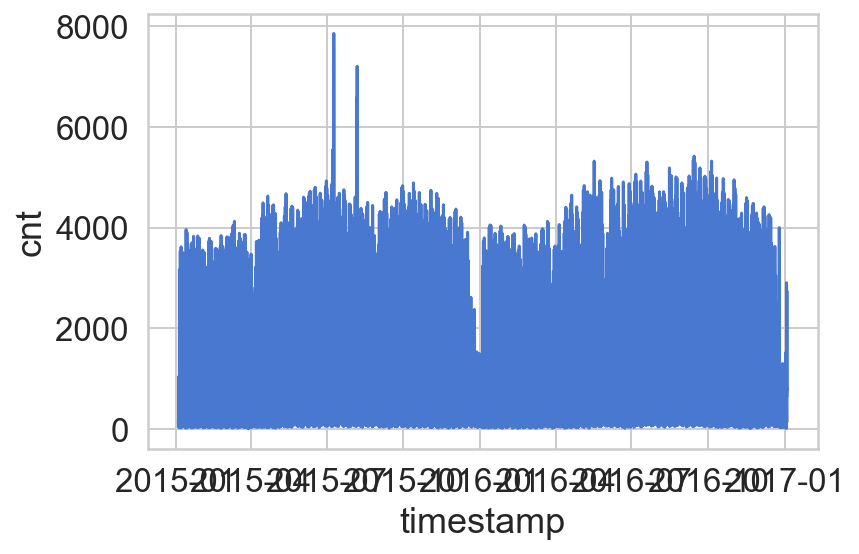

In [9]:
sns.lineplot(x=df.index, y="cnt", data=df)

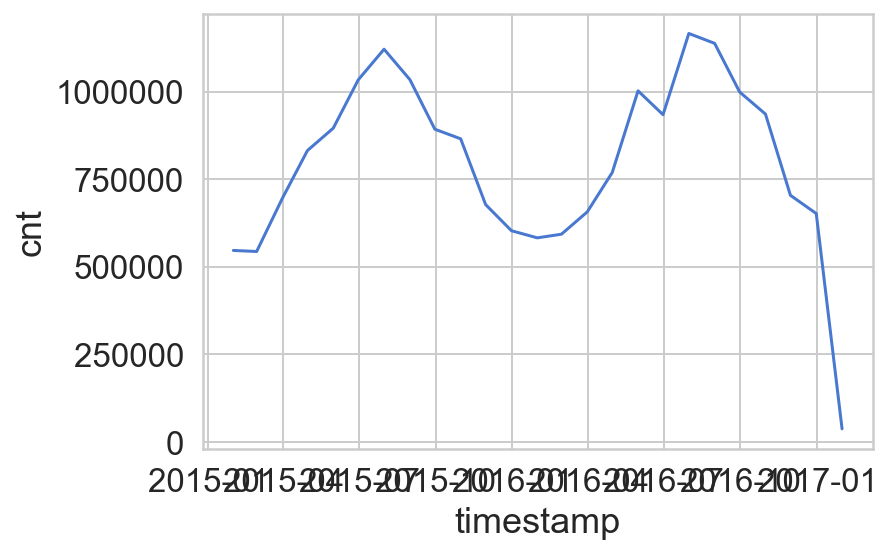

In [11]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month)

In [13]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [14]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

C:\Users\ven_n_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ven_n_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ven_n_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [15]:
train.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.464876,-1.2500,-1.047619,0.975,-0.818182,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,-0.495179,-1.2500,-1.000000,0.975,-0.909091,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,-0.497934,-1.3125,-1.000000,1.150,-1.363636,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,-0.540634,-1.3750,-1.047619,1.325,-1.363636,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,-0.557851,-1.3750,-1.238095,0.975,-0.772727,1.0,0.0,1.0,3.0,4,4,6,1


In [16]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [17]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15662, 10, 13) (15662,)


In [21]:
X_train[0]

array([[-0.46487603, -1.25      , -1.04761905,  0.975     , -0.81818182,
         3.        ,  0.        ,  1.        ,  3.        ,  0.        ,
         4.        ,  6.        ,  1.        ],
       [-0.49517906, -1.25      , -1.        ,  0.975     , -0.90909091,
         1.        ,  0.        ,  1.        ,  3.        ,  1.        ,
         4.        ,  6.        ,  1.        ],
       [-0.49793388, -1.3125    , -1.        ,  1.15      , -1.36363636,
         1.        ,  0.        ,  1.        ,  3.        ,  2.        ,
         4.        ,  6.        ,  1.        ],
       [-0.54063361, -1.375     , -1.04761905,  1.325     , -1.36363636,
         1.        ,  0.        ,  1.        ,  3.        ,  3.        ,
         4.        ,  6.        ,  1.        ],
       [-0.55785124, -1.375     , -1.23809524,  0.975     , -0.77272727,
         1.        ,  0.        ,  1.        ,  3.        ,  4.        ,
         4.        ,  6.        ,  1.        ],
       [-0.55853994, -1.375   

In [22]:
X_train[0][0]

array([-0.46487603, -1.25      , -1.04761905,  0.975     , -0.81818182,
        3.        ,  0.        ,  1.        ,  3.        ,  0.        ,
        4.        ,  6.        ,  1.        ])

In [23]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Train on 14095 samples, validate on 1567 samples
Epoch 1/30
14095/14095 [==============================] - 33s 2ms/sample - loss: 0.3126 - val_loss: 0.1138
Epoch 2/30
14095/14095 [==============================] - 18s 1ms/sample - loss: 0.0832 - val_loss: 0.0526
Epoch 3/30
14095/14095 [==============================] - 17s 1ms/sample - loss: 0.0506 - val_loss: 0.0494
Epoch 4/30
14095/14095 [==============================] - 19s 1ms/sample - loss: 0.0384 - val_loss: 0.0389
Epoch 5/30
14095/14095 [==============================] - 18s 1ms/sample - loss: 0.0318 - val_loss: 0.0319
Epoch 6/30
14095/14095 [==============================] - 16s 1ms/sample - loss: 0.0290 - val_loss: 0.0322
Epoch 7/30
14095/14095 [==============================] - 22s 2ms/sample - loss: 0.0260 - val_loss: 0.0368
Epoch 8/30
14095/14095 [==============================] - 18s 1ms/sample - loss: 0.0239 - val_loss: 0.0373
Epoch 9/30
14095/14095 [==============================] - 17s 1ms/sample - loss: 0.0223 - val_l

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  145408    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  257       
Total params: 145,665
Trainable params: 145,665
Non-trainable params: 0
_________________________________________________________________


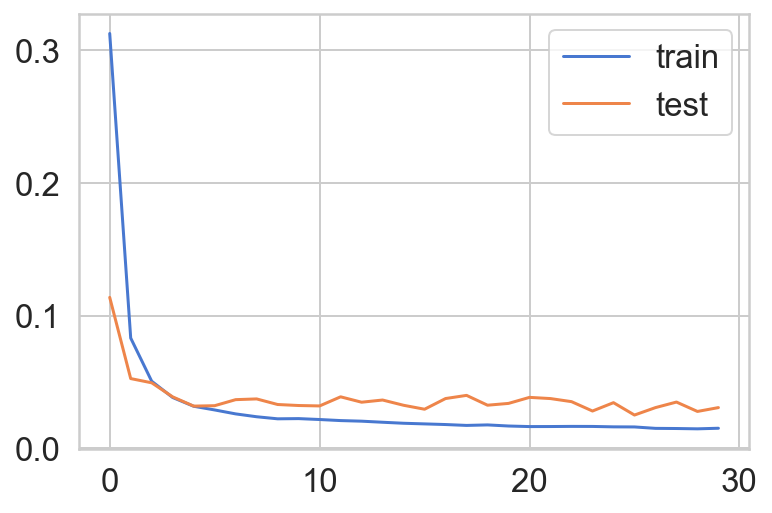

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();


In [31]:
model1 = keras.Sequential()
model1.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model1.add(keras.layers.Dropout(rate=0.2))
model1.add(keras.layers.Dense(units=1))
#model1.add(keras.layers.Dense(units=1,activation='relu'))
model1.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
history = model1.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Train on 14095 samples, validate on 1567 samples
Epoch 1/30
14095/14095 [==============================] - 31s 2ms/sample - loss: 0.5913 - val_loss: 0.8572
Epoch 2/30
14095/14095 [==============================] - 19s 1ms/sample - loss: 0.5912 - val_loss: 0.8572
Epoch 3/30
14095/14095 [==============================] - 26s 2ms/sample - loss: 0.5913 - val_loss: 0.8572
Epoch 4/30
14095/14095 [==============================] - 22s 2ms/sample - loss: 0.5913 - val_loss: 0.8572
Epoch 5/30
14095/14095 [==============================] - 18s 1ms/sample - loss: 0.5913 - val_loss: 0.8572
Epoch 6/30
14095/14095 [==============================] - 20s 1ms/sample - loss: 0.5913 - val_loss: 0.8572
Epoch 7/30
14095/14095 [==============================] - 21s 2ms/sample - loss: 0.5913 - val_loss: 0.8572
Epoch 8/30
14095/14095 [==============================] - 20s 1ms/sample - loss: 0.5913 - val_loss: 0.8572
Epoch 9/30
14095/14095 [==============================] - 20s 1ms/sample - loss: 0.5913 - val_l

KeyboardInterrupt: 